In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:

# Load the dataset
dataset_path = "/content/iris.csv"  # Ensure this dataset is in the same directory
data = pd.read_csv(dataset_path)

# Display dataset information
print("Dataset Preview:")
print(data.head())
print("Dataset Info:")
print(data.info())


Dataset Preview:
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:

# Define features and target variable
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species_id'

X = data[features]
y = data[target]

# Split dataset with different test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

# Define and train the MLP model with different hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)

Model Accuracy: 0.7632
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.18      0.31        11
           3       0.57      1.00      0.73        12

    accuracy                           0.76        38
   macro avg       0.86      0.73      0.68        38
weighted avg       0.86      0.76      0.71        38

Confusion Matrix:


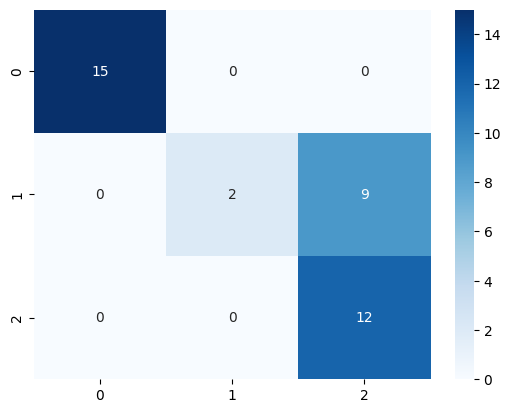

In [9]:

# Make predictions and evaluate the model
y_pred = mlp_model.predict(X_test_scaled)

# Display results
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()
